In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
BASE_DIR = '/content/drive/MyDrive/npr/'

# Imports

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from local_utils import detect_lp
from os.path import splitext,basename
from keras.models import model_from_json

# Load WPOD-NET

In [ ]:
def load_model(path):
    try:
        path = splitext(path)[0]
        with open('%s.json' % path, 'r') as json_file:
            model_json = json_file.read()
        model = model_from_json(model_json, custom_objects={})
        model.load_weights('%s.h5' % path)
        print("success")
        return model
    except Exception as e:
        print(e)

In [ ]:
model_path = BASE_DIR + 'models/wpod-net.json'
wpod_net = load_model(model_path)

success


# Process Image

In [ ]:
def preprocess_image(image_path,resize=False):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255
    if resize:
        img = cv2.resize(img, (224,224))
    return img

In [ ]:
image_path = BASE_DIR + 'plates/'

# Detect Plate

In [ ]:
def get_plate(image_path, Dmax=608, Dmin=256):
    vehicle = preprocess_image(image_path)
    ratio = float(max(vehicle.shape[:2])) / min(vehicle.shape[:2])
    side = int(ratio * Dmin)
    bound_dim = min(side, Dmax)
    _ , LpImg, _, cor = detect_lp(wpod_net, vehicle, bound_dim, lp_threshold=0.5)
    return LpImg, cor

# Test 1

In [ ]:
test_image = image_path + 'new.jpg'
LpImg,cor = get_plate(test_image)
print("Detect %i plate(s) in"%len(LpImg),splitext(basename(test_image))[0])
print("Coordinate of plate(s) in image: \n", cor)
plt.imsave(image_path + 'ne1w.jpg', LpImg[0])

Detect 1 plate(s) in new
Coordinate of plate(s) in image: 
 [array([[113.28541001, 256.83751082, 257.53668285, 113.98458204],
       [450.0555071 , 457.37150144, 487.35257892, 480.03658458],
       [  1.        ,   1.        ,   1.        ,   1.        ]])]


# Test & Results

In [ ]:
img_file_name = 'car1.jpg'
test_image = image_path + img_file_name

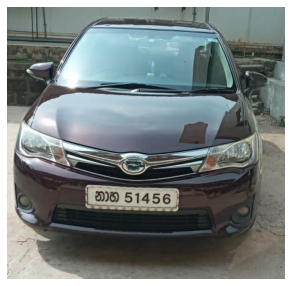

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.axis(False)
plt.imshow(preprocess_image(test_image))

In [ ]:
LpImg,cor = get_plate(test_image)
print("Detect %i plate(s) in"%len(LpImg),splitext(basename(test_image))[0])
print("Coordinate of plate(s) in image: \n", cor)
plt.imsave(image_path + img_file_name, LpImg[0])

Detect 1 plate(s) in car1
Coordinate of plate(s) in image: 
 [array([[130.76272771, 281.57190325, 279.86881648, 129.05964094],
       [289.51232285, 296.54941366, 336.19937333, 329.16228251],
       [  1.        ,   1.        ,   1.        ,   1.        ]])]


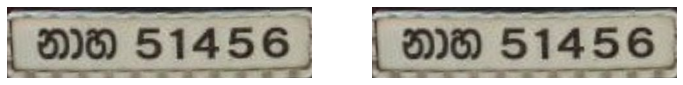

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.axis(False)
plt.imshow(preprocess_image(test_image))
plt.subplot(1,2,2)
plt.axis(False)
plt.imshow(LpImg[0])

plt.savefig("result.jpg",dpi=300)

# Test 2

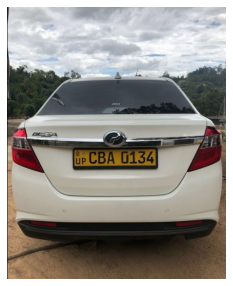

In [ ]:
img_file_name2 = 'caren.jpeg'
test_image2 = image_path + img_file_name2
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.axis(False)
plt.imshow(preprocess_image(test_image2))

In [ ]:
LpImg,cor = get_plate(test_image2)
print("Detect %i plate(s) in"%len(LpImg),splitext(basename(test_image2))[0])
print("Coordinate of plate(s) in image: \n", cor)
plt.imsave(image_path + "plate" + img_file_name2 , LpImg[0])

Detect 1 plate(s) in caren
Coordinate of plate(s) in image: 
 [array([[156.56389991, 366.89217373, 366.55179501, 156.22352119],
       [344.07097938, 341.74833989, 392.17686939, 394.49950888],
       [  1.        ,   1.        ,   1.        ,   1.        ]])]


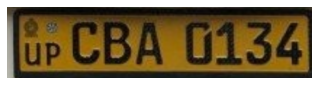

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.axis(False)
plt.imshow(preprocess_image(test_image2))
plt.imshow(LpImg[0])

plt.savefig("result.jpg",dpi=300)

# Testing Image with multiple LP's

In [ ]:
test_image_2 = image_path + 'fleet-1.jpg'
LpImg,cor = get_plate(test_image_2)
print("Detect %i plate(s) in"%len(LpImg),splitext(basename(test_image_2))[0])
print("Coordinate of plate(s) in image: \n", cor)

Detect 3 plate(s) in fleet-1
Coordinate of plate(s) in image: 
 [array([[324.25645844, 441.05272453, 441.05585381, 324.25958772],
       [292.13466256, 292.02109229, 318.30788618, 318.42145644],
       [  1.        ,   1.        ,   1.        ,   1.        ]]), array([[628.03960272, 698.41883318, 698.16526476, 627.7860343 ],
       [224.51234212, 224.72631919, 241.79764153, 241.58366446],
       [  1.        ,   1.        ,   1.        ,   1.        ]]), array([[ 77.47503494, 146.90419387, 146.829563  ,  77.40040407],
       [211.47731612, 212.72548722, 228.56614391, 227.31797281],
       [  1.        ,   1.        ,   1.        ,   1.        ]])]


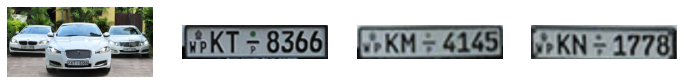

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,4,1)
plt.axis(False)
plt.imshow(preprocess_image(test_image_2))
plt.subplot(1,4,2)
plt.axis(False)
plt.imshow(LpImg[0])
plt.subplot(1,4,3)
plt.axis(False)
plt.imshow(LpImg[1])
plt.subplot(1,4,4)
plt.axis(False)
plt.imshow(LpImg[2])
plt.savefig("result_2.jpg",dpi=300)

# Extract Images from Folder

In [ ]:
import glob
import os

In [ ]:
image_folder = glob.glob(image_path + "*.jpg")
extracted_folder = BASE_DIR + "extracted_plates/"

In [ ]:
for path in image_folder:
  print(os.path.basename(path))

x (3).jpg
x (1).jpg
x (2).jpg
new.jpg


In [ ]:
for path in image_folder:
  LpImg,cor = get_plate(path)
  for img in LpImg:
    plt.imsave(extracted_folder + os.path.basename(path), img)

# Preprocessing

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
if (len(LpImg)): #check if there is at least one license image
    # Scales, calculates absolute values, and converts the result to 8-bit.
    plate_image = cv2.convertScaleAbs(LpImg[0], alpha=(255.0))

    # convert to grayscale and blur the image
    gray = cv2.cvtColor(plate_image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(7,7),0)

    # Applied inversed thresh_binary
    binary = cv2.threshold(blur, 180, 255,
                         cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    ## Applied dilation
    kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    thre_mor = cv2.morphologyEx(binary, cv2.MORPH_DILATE, kernel3)

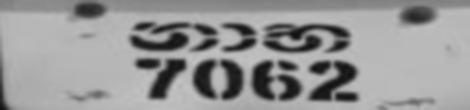

In [ ]:
cv2_imshow(blur)

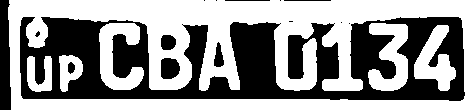

In [ ]:
cv2_imshow(thre_mor)

# Detect Chars OpenCV

In [ ]:
plate_image = cv2.imread(test_image2)

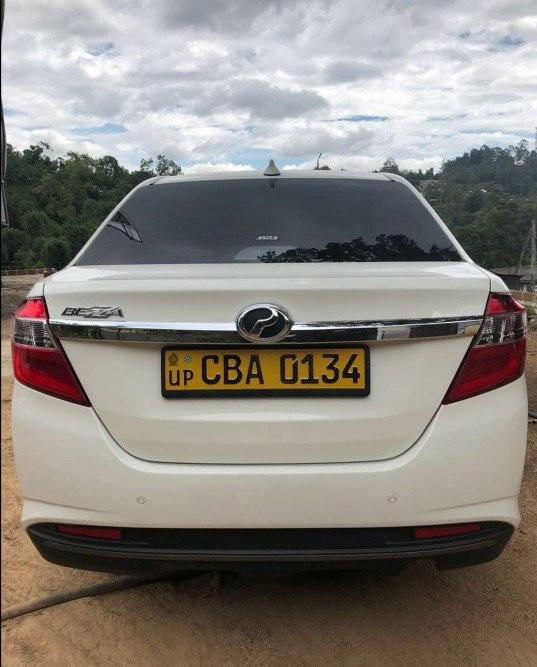

In [ ]:
cv2_imshow(plate_image)

In [ ]:

# Create sort_contours() function to grab the contour of each digit from left to right
def sort_contours(cnts,reverse = False):
    i = 0
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    return cnts

cont, _  = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# creat a copy version "test_roi" of plat_image to draw bounding box
test_roi = plate_image.copy()

# Initialize a list which will be used to append charater image
crop_characters = []

# define standard width and height of character
digit_w, digit_h = 30, 60

for c in sort_contours(cont):
    (x, y, w, h) = cv2.boundingRect(c)
    ratio = h/w
    if 1<=ratio<=3.5: # Only select contour with defined ratio
        if h/plate_image.shape[0]>=0.5: # Select contour which has the height larger than 50% of the plate
            # Draw bounding box arroung digit number
            cv2.rectangle(test_roi, (x, y), (x + w, y + h), (0, 255,0), 2)

            # Sperate number and gibe prediction
            curr_num = thre_mor[y:y+h,x:x+w]
            curr_num = cv2.resize(curr_num, dsize=(digit_w, digit_h))
            _, curr_num = cv2.threshold(curr_num, 220, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            crop_characters.append(curr_num)

print("Detect {} letters...".format(len(crop_characters)))

Detect 0 letters...


In [ ]:
for img in crop_characters:
  cv2_imshow(img)

# LPRNET

In [ ]:
%cd drive/MyDrive/npr/

/content/drive/MyDrive/npr


In [ ]:
%cd LPRNet_Pytorch

/content/drive/MyDrive/npr/LPRNet_Pytorch


In [ ]:
%ls

data/  LICENSE  model/  README.md  test_LPRNet.py  train_LPRNet.py  weights/


In [ ]:
!python train_LPRNet.py --train_img_dirs "./data/test/"